In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud

In [ ]:
from google.colab import files
data = files.upload()

Saving Clean Dataset Jaklingko.csv to Clean Dataset Jaklingko.csv


## EDA dan Labeling

In [ ]:
df = pd.read_csv("Clean Dataset Jaklingko.csv")
df

,userName,score,at,content
0,Iqbal Permana Putra,1,2023-11-16 00:24:27,Interface buruk menyulitkan pengguna. Beli tik...
1,Sahabudin,1,2023-11-13 12:29:34,Tolong check out nya jangan harus sesuai tujua...
2,Jefri Manurung,5,2023-11-03 13:04:44,fast response when handling my complaint
3,lexa,1,2023-11-02 00:52:46,tiket udah di beli tapi tak bisa digunakan. re...
4,Reza MM,1,2023-10-27 14:20:38,"Buruk bgt, jangan coba2. Mending beli kartu em..."
...,...,...,...,...
321,Rudatz FM,5,2022-01-03 06:54:01,Alhamdulillah... akhirnya bisa terealisasi jug...
322,Adhit Arham,5,2022-01-03 05:31:40,The best apps for your commuting needs!
323,Dedy Suryadi,5,2022-01-03 04:38:31,Wuiiiiihhhh cakep nih kalo kejadian beneran
324,Mohammad Dwijanuarto,5,2022-01-03 04:35:14,"Great apps, user friendly, unique"


In [ ]:
df['at'].sort_values

<bound method Series.sort_values of 0      2023-11-16 00:24:27
1      2023-11-13 12:29:34
2      2023-11-03 13:04:44
3      2023-11-02 00:52:46
4      2023-10-27 14:20:38
              ...         
321    2022-01-03 06:54:01
322    2022-01-03 05:31:40
323    2022-01-03 04:38:31
324    2022-01-03 04:35:14
325    2022-01-03 04:34:24
Name: at, Length: 326, dtype: object>

In [ ]:
total_polaritas = 0
total_ulasan = []

for ulasan in df["content"] :
    try:

        print(ulasan)

        analisis = TextBlob(ulasan)
        an = analisis.translate(from_lang="id", to="en")

        total_polaritas += an.polarity
        total_ulasan.append([ulasan, an.polarity, an.subjectivity])

        print(an.sentiment, "\n")

    except Exception as e:
        print("Upzie!")

Interface buruk menyulitkan pengguna. Beli tiket bolak balik pindah aplikasi. Dompet digital tdk langsung connect ke saldo jaklingko, berkali-kali error. Pilihan vendor dompet digital sangat sedikit
Sentiment(polarity=-0.12421874999999998, subjectivity=0.4020833333333333) 

Tolong check out nya jangan harus sesuai tujuan di aplikasi, itu sgt bikin ribet
Sentiment(polarity=-0.65, subjectivity=1.0) 

fast response when handling my complaint
Upzie!
tiket udah di beli tapi tak bisa digunakan. refund pun tidak ada
Sentiment(polarity=0.0, subjectivity=0.0) 

Buruk bgt, jangan coba2. Mending beli kartu emoney, flazz, atau yg lainnya aja. Rute 6V GBK-Ragunan error mau naik dr halte GBK karena detail perjalanannya tulisannya halte Polda Metro. Kesalahan 1, developer gak update data sehingga merugikan pengguna. Kesalahan 2, mereka hanya minta maaf dan kasih saran lain kali pilih tujuan yg benar, pdhl sy udh pilih tujuan yg benar tp detail dr mereka yg gak update. Gak merasa salah dan gak mau gan

In [ ]:
df

,userName,score,at,content
0,Iqbal Permana Putra,1,2023-11-16 00:24:27,Interface buruk menyulitkan pengguna. Beli tik...
1,Sahabudin,1,2023-11-13 12:29:34,Tolong check out nya jangan harus sesuai tujua...
2,Jefri Manurung,5,2023-11-03 13:04:44,fast response when handling my complaint
3,lexa,1,2023-11-02 00:52:46,tiket udah di beli tapi tak bisa digunakan. re...
4,Reza MM,1,2023-10-27 14:20:38,"Buruk bgt, jangan coba2. Mending beli kartu em..."
...,...,...,...,...
321,Rudatz FM,5,2022-01-03 06:54:01,Alhamdulillah... akhirnya bisa terealisasi jug...
322,Adhit Arham,5,2022-01-03 05:31:40,The best apps for your commuting needs!
323,Dedy Suryadi,5,2022-01-03 04:38:31,Wuiiiiihhhh cakep nih kalo kejadian beneran
324,Mohammad Dwijanuarto,5,2022-01-03 04:35:14,"Great apps, user friendly, unique"


In [ ]:
clean_df = pd.DataFrame(total_ulasan, columns=['Ulasan', 'Polaritas', 'Subjektivitas'])

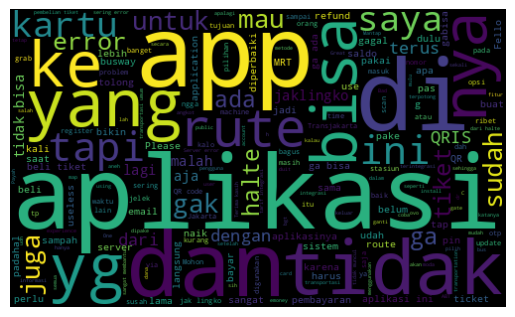

In [ ]:
allWord = ' '.join([rev for rev in clean_df['Ulasan']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWord)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def getAnalysis(score):
    if score < 0 :
        return "Negatif"
    elif score == 0 :
        return "Netral"
    else :
        return "Positif"

clean_df["Analisis"] = clean_df["Polaritas"].apply(getAnalysis)

clean_df

,Ulasan,Polaritas,Subjektivitas,Analisis
0,Interface buruk menyulitkan pengguna. Beli tik...,-0.124219,0.402083,Negatif
1,Tolong check out nya jangan harus sesuai tujua...,-0.650000,1.000000,Negatif
2,tiket udah di beli tapi tak bisa digunakan. re...,0.000000,0.000000,Netral
3,"Buruk bgt, jangan coba2. Mending beli kartu em...",-0.013929,0.527738,Negatif
4,"Server nya jelekkk, lemot dan gagal mulu saat ...",-0.500000,0.566667,Negatif
...,...,...,...,...
296,"Wahhh, keren nih aplikasi jadi gampang, cuma b...",0.391667,0.741667,Positif
297,Great super app,0.566667,0.708333,Positif
298,Alhamdulillah... akhirnya bisa terealisasi jug...,0.136905,0.594048,Positif
299,Wuiiiiihhhh cakep nih kalo kejadian beneran,0.000000,0.000000,Netral


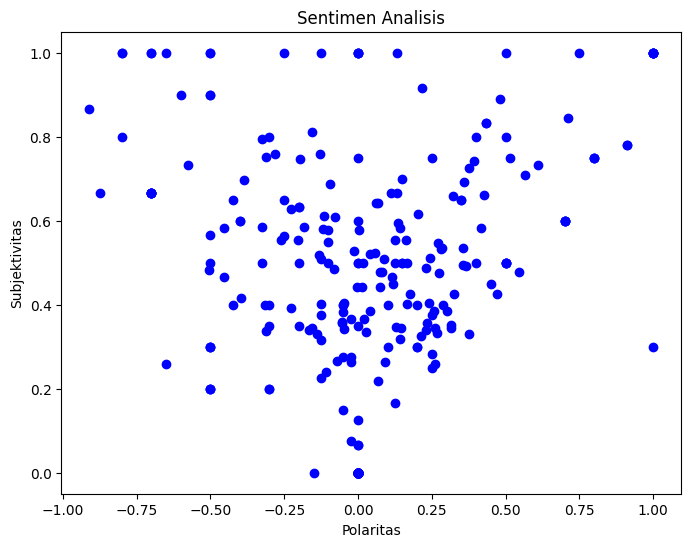

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, clean_df.shape[0]):
    plt.scatter(clean_df['Polaritas'][i], clean_df['Subjektivitas'][i], color='Blue')

plt.title('Sentimen Analisis')
plt.xlabel('Polaritas')
plt.ylabel('Subjektivitas')
plt.show()

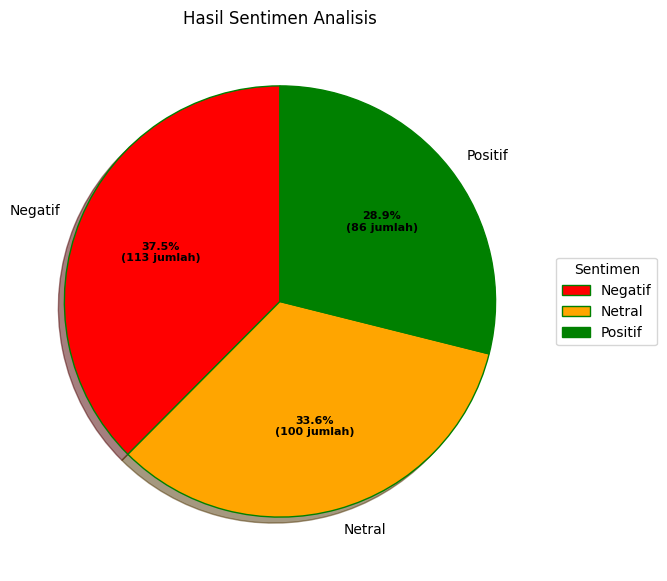

In [ ]:
# Creating color parameters
colors = ( "red", "orange", "green")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

label_analisis = ['Negatif', 'Netral', 'Positif']

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} jumlah)".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(clean_df['Analisis'].value_counts(),
                                  autopct = lambda pct: func(pct, clean_df['Analisis'].value_counts()),
                                  labels = label_analisis,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, label_analisis,
          title ="Sentimen",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Hasil Sentimen Analisis")

# show plot
plt.show()

## Preprocessing Data

### Removing AlphaNumeric dan Character dan lower case

In [ ]:
import re

# Fungsi untuk membersihkan karakter
def bersihkan_teks(teks):
    # Hapus karakter selain alphabet
    teks_bersih = re.sub(r'[^a-zA-Z0-9\s]', '', teks)
    teks_bersih = re.sub('\S*\d\S*', '', teks_bersih).strip() # menghapus kata yang terdapat simbol simbol
    return teks_bersih




In [ ]:
pre_df = clean_df
pre_df['Ulasan'] = clean_df['Ulasan'].apply(bersihkan_teks)

### Removal Stopwords

In [ ]:
import nltk
nltk.download('stopwords')

pre_df['Ulasan'] = pre_df['Ulasan'].apply(lambda x: x.lower().replace(",", " "))
stop_words = set(nltk.corpus.stopwords.words("indonesian"))
pre_df['Ulasan'] = pre_df['Ulasan'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Label Encoding

In [ ]:
pre_df["Analisis"] = pre_df["Analisis"].replace({
    "Positif": 1,
    "Negatif": -1,
    "Netral": 0
})

In [ ]:
pre_df.head()

,Ulasan,Polaritas,Subjektivitas,Analisis
0,interface buruk menyulitkan pengguna beli tike...,-0.124219,0.402083,-1
1,tolong check out nya sesuai tujuan aplikasi sg...,-0.650000,1.000000,-1
2,tiket udah beli refund,0.000000,0.000000,0
3,buruk bgt mending beli kartu emoney flazz yg a...,-0.013929,0.527738,-1
4,server nya jelekkk lemot gagal mulu pembayaran,-0.500000,0.566667,-1


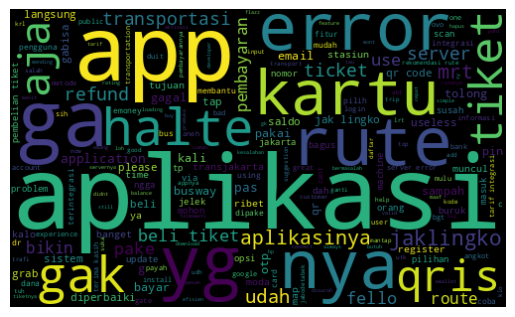

In [ ]:
allWord = ' '.join([rev for rev in pre_df['Ulasan']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWord)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from collections import Counter

# Hitung frekuensi kemunculan setiap kata
word_freq = Counter(allWord.split())

# Convert hasil perhitungan ke dalam bentuk DataFrame pandas
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Kata', 'Jumlah'])

# Sort DataFrame berdasarkan jumlah kemunculan
word_freq_df = word_freq_df.sort_values(by='Jumlah', ascending=False)

# Tampilkan tabel kata paling sering muncul
word_freq_df.head(20)

,Kata,Jumlah
8,aplikasi,84
112,the,65
198,app,51
177,ga,47
5,tiket,46
317,to,41
38,rute,38
209,i,38
17,error,37
36,yg,35


## Tuning

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pre_df["Ulasan"], pre_df["Analisis"], test_size=0.3, random_state=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cv = CountVectorizer()
# cv = TfidfVectorizer(lowercase=False)
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)


In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)


In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

print(classification_report(y_test, predictions))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Regressor
boosting = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42)

# Fit and Predict
boosting.fit(X_train, y_train)
boosting_predictions = boosting.predict(X_test)
print(classification_report(y_test, boosting_predictions))

## Hasil Akhir (Best tuning)

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(pre_df["Ulasan"], pre_df["Analisis"], test_size=0.25, random_state=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cv = CountVectorizer()
# cv = TfidfVectorizer(lowercase=False)
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)


In [ ]:
from sklearn.svm import LinearSVC

model2 = LinearSVC()
model2.fit(X_train, y_train)


In [ ]:
predictions = model2.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
# Creating color parameters
colors = ( "red", "orange", "green")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

label_analisis = ['Negatif', 'Netral', 'Positif']

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} jumlah)".format(pct, absolute)

boosting_predictions = pd.Series(boosting_predictions)
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(boosting_predictions.value_counts(),
                                  autopct = lambda pct: func(pct, boosting_predictions.value_counts()),
                                  labels = label_analisis,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, label_analisis,
          title ="Sentimen",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Hasil Sentimen Analisis")

# show plot
plt.show()